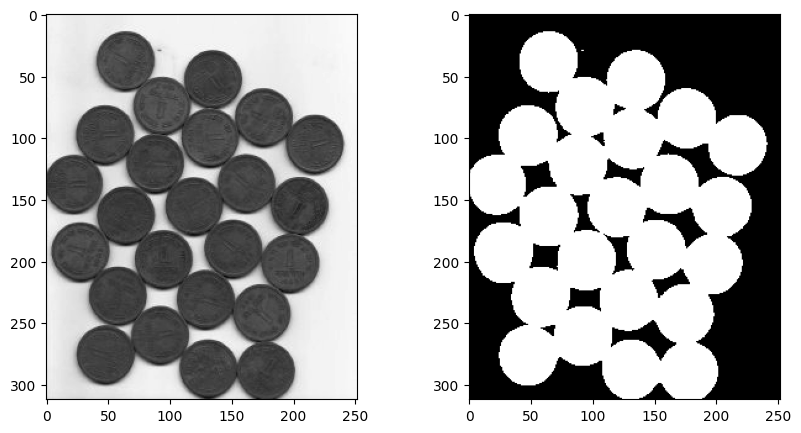

In [4]:
import numpy as np
import cv2 as cv
import cv2
from matplotlib import pyplot as plt
 
img = cv.imread('water_coins.jpg',cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.show()

**Morphological Gradient Processing**

Morphological Gradient Processing là một kỹ thuật trong xử lý ảnh dùng để nhấn mạnh biên của các đối tượng trong ảnh. Có thể được sử dụng để giảm nhiễu ở đường biên. Morphological Gradient là sự khác biệt giữa phép giãn (dilation) và phép co (erosion) của một ảnh. Phép toán này làm nổi bật các biên của đối tượng bằng cách tính toán độ dày của biên:

- Dilation (giãn): Mở rộng các vùng sáng trong ảnh.
- Erosion (co): Thu nhỏ các vùng sáng trong ảnh.

Công thức để tính toán Morphological Gradient của một ảnh 𝐼 với một phần tử cấu trúc 𝑆 là: Gradient = Dilation(𝐼,𝑆) − Erosion(𝐼,𝑆)

Trong đó:

- Dilation(𝐼,𝑆) là ảnh sau khi áp dụng phép giãn.
Một pixel 𝑥 trong ảnh kết quả 𝐷(𝐼) sẽ được gán giá trị: 𝐷(𝐼)(𝑥) = max⁡(𝑦∈𝑆) 𝐼(𝑥+𝑦) --> D(I)=I⊕S Trong đó 𝑦 là các pixel trong vùng lân cận được xác định bởi phần tử cấu trúc 𝑆.
- Erosion(𝐼,𝑆) là ảnh sau khi áp dụng phép co.
Một pixel 𝑥 trong ảnh kết quả E(𝐼) sẽ được gán giá trị: E(𝐼)(𝑥) = min⁡(𝑦∈𝑆) 𝐼(𝑥-𝑦) --> E(I)=I⊖S Trong đó 𝑦 là các pixel trong vùng lân cận được xác định bởi phần tử cấu trúc 𝑆.
- Phần tử cấu trúc S là một ma trận nhỏ, thường là ma trận nhị phân, được sử dụng để định nghĩa vùng lân cận của mỗi pixel trong ảnh gốc khi thực hiện các phép toán hình thái học. Các giá trị trong phần tử cấu trúc xác định cách thức các pixel lân cận được xét đến trong các phép toán này.

Morphological Gradient Processing được sử dụng trong nhiều ứng dụng xử lý ảnh như:
- Phát hiện biên: Nhấn mạnh các đường biên của đối tượng trong ảnh.
- Phân đoạn ảnh: Chuẩn bị cho các bước xử lý tiếp theo như phân đoạn đối tượng.
- Xử lý tiền xử lý: Làm sạch và cải thiện chất lượng ảnh trước khi áp dụng các thuật toán phức tạp khác.

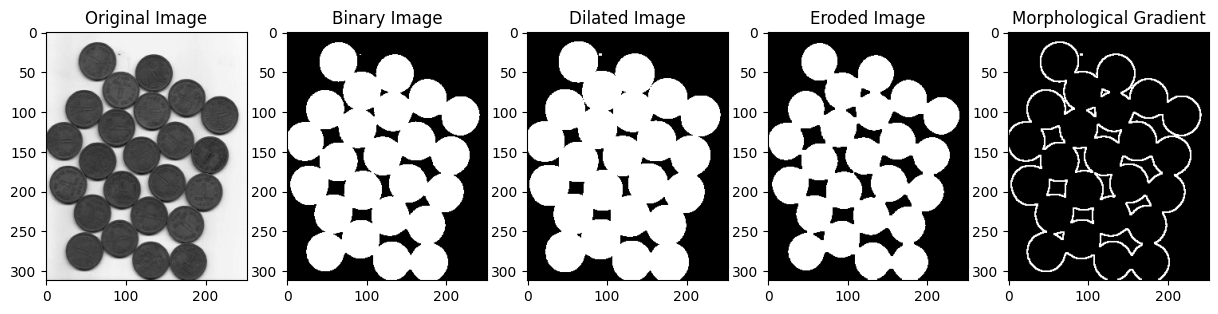

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang ảnh nhị phân
image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tạo phần tử cấu trúc (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Tính toán Dilation và Erosion
dilated = cv2.dilate(binary_image, kernel)
eroded = cv2.erode(binary_image, kernel)

# Tính toán Morphological Gradient
# gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)
gradient = dilated - eroded

# Hiển thị kết quả
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Morphological Gradient')
plt.imshow(gradient, cmap='gray')

plt.show()

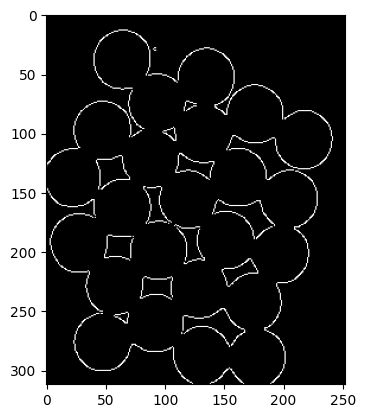

In [8]:
edges = cv2.Canny(binary_image, 100, 200)
plt.imshow(edges, cmap='gray')

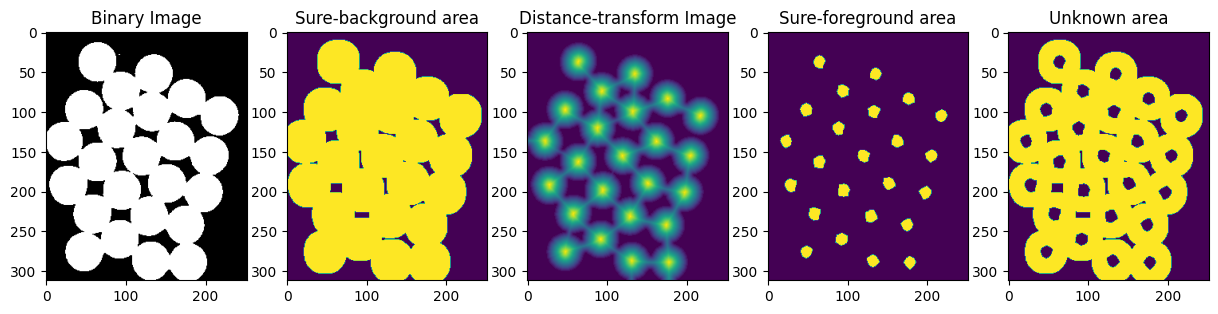

In [24]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Hiển thị kết quả
plt.figure(figsize=(15, 6))

plt.subplot(1, 5, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Sure-background area')
plt.imshow(sure_bg)

plt.subplot(1, 5, 3)
plt.title('Distance-transform Image')
plt.imshow(dist_transform)

plt.subplot(1, 5, 4)
plt.title('Sure-foreground area')
plt.imshow(sure_fg)

plt.subplot(1, 5, 5)
plt.title('Unknown area')
plt.imshow(unknown)

plt.show()

In [30]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [35]:
print(ret)

25


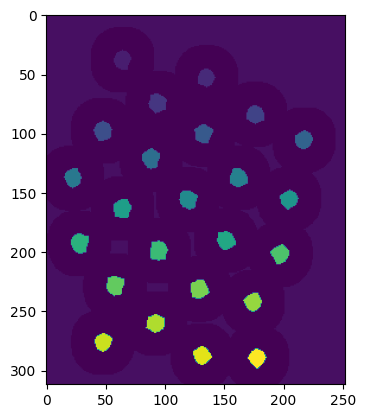

In [32]:

plt.imshow(markers)

plt.show()

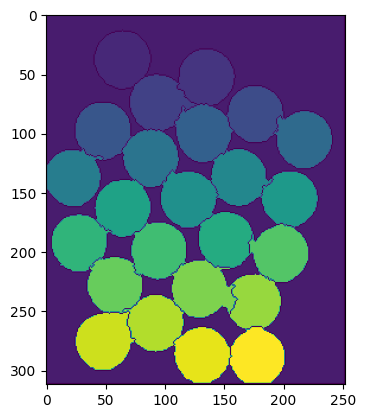

In [33]:
image_original = cv2.imread('water_coins.jpg')

# Áp dụng thuật toán Watershed cho ảnh gốc với makers
markers = cv2.watershed(image_original, markers)

plt.imshow(markers)

plt.show()


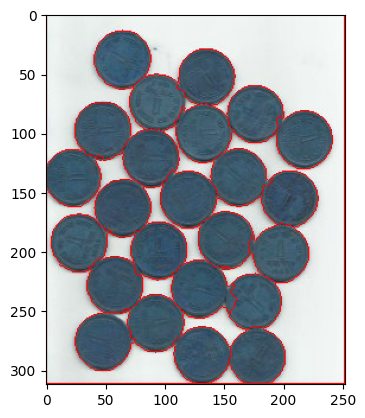

In [34]:
image_original[markers == -1] = [255,0,0]
plt.imshow(image_original)

plt.show()